In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 2D Dirichlet

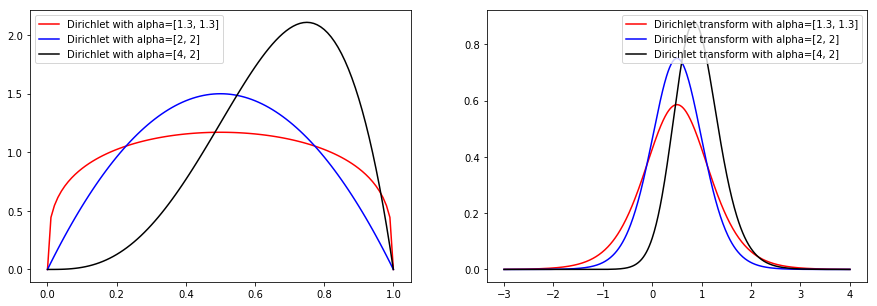

In [38]:
#test 
from scipy.special import gamma
from scipy.stats import norm

#def gamma_func(n):
#    return(np.math.factorial(n-1))

#transformed to softmax space
def softmax_transform(a):
    x = np.exp(a)/np.sum(np.exp(a))
    return(x)

def beta_function(alpha):
    nom = np.prod([gamma(a_i) for a_i in alpha])
    den = gamma(np.sum(alpha))
    return(nom/den)

def dirichlet(x, alpha):
    l = []
    for i in range(len(alpha)):
        l.append(x[i]**(alpha[i] - 1))
    nom = np.prod(l)
    den = beta_function(alpha)
    return(nom/den)

"""
def dirichlet_transform(x, alpha):
    l = []
    x = softmax_transform(x)
    for i in range(len(alpha)):
        l.append(x[i]**(alpha[i] - 1))
    nom = np.prod(l)
    den = beta_function(alpha)
    return(nom/den)
"""

def dirichlet_transform(x, alpha):
    I = len(x)
    C = I/beta_function(alpha)
    sum_exp = np.sum(np.exp(x))
    r = []
    for i in range(I):
        r.append((np.exp(x[i])/sum_exp)**alpha[i])
    R = np.prod(np.array(r))
    return(C * R)


linspace = np.linspace(0, 1.0, 100 +1)
linspace2 = np.linspace(-3, 4, 700 +1)
xx_simplex = []
for x in linspace:
    xx_simplex.append([x,1 -x])

xx_test = []
for x in linspace2:
    xx_test.append([x, 1 - x])

alpha1 = [1.3, 1.3]
alpha2 = [2, 2]
alpha3 = [4, 2]
y1 = [dirichlet(x, alpha1) for x in xx_simplex]
y1_trans = [dirichlet_transform(x, alpha1) for x in xx_test]
y2 = [dirichlet(x, alpha2) for x in xx_simplex]
y2_trans = [dirichlet_transform(x, alpha2) for x in xx_test]
y3 = [dirichlet(x, alpha3) for x in xx_simplex]
y3_trans = [dirichlet_transform(x, alpha3) for x in xx_test]




fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 5))
axs[0].plot(linspace, y1, 'r-', label='Dirichlet with alpha={}'.format(alpha1))
axs[0].plot(linspace, y2, 'b-', label='Dirichlet with alpha={}'.format(alpha2))
axs[0].plot(linspace, y3, 'k-', label='Dirichlet with alpha={}'.format(alpha3))
axs[0].legend()

axs[1].plot(linspace2, y1_trans, 'r-', label='Dirichlet transform with alpha={}'.format(alpha1))
axs[1].plot(linspace2, y2_trans, 'b-', label='Dirichlet transform with alpha={}'.format(alpha2))
axs[1].plot(linspace2, y3_trans, 'k-', label='Dirichlet transform with alpha={}'.format(alpha3))
axs[1].legend()

plt.savefig('dirichlet_playground.pdf')

[[1.2 0. ]
 [0.  1.2]]
[[4. 0.]
 [0. 4.]]
[0.5 0.5]
[0.5 0.5]
[0.84657359 0.15342641]
[ 1.04930614 -0.04930614]
transmode1:  0.5855088350351597
transmode2:  0.75
transmode3:  0.8779149519890259
transmode4:  0.9343872070312508


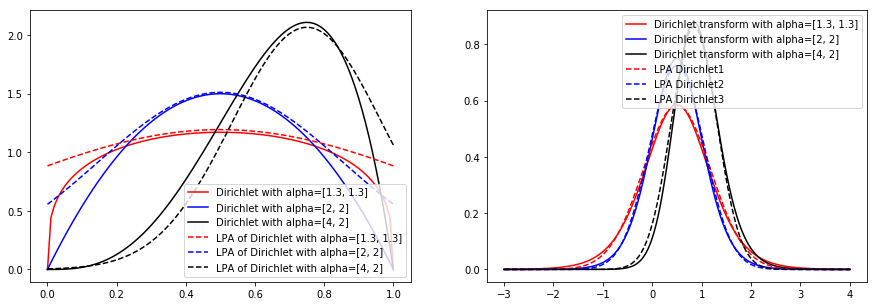

In [48]:
def dir_mode(alpha):
    K = len(alpha)
    C = np.sum(alpha) - K
    x = np.array(np.array(alpha )- 1)/C
    return(x)

"""
def dir_trans_mode(alpha):
    K = len(alpha)
    C = np.sum(alpha)
    x = np.array(np.array(alpha))/C
    return(x)
"""

def dir_trans_mode(alpha):
    x1 = (np.log(alpha[0]/alpha[1]) + 1)/2
    x2 = (np.log(alpha[1]/alpha[0]) + 1)/2
    return(np.array([x1, x2]))


def multivariate_normal_pdf(X, mu, Sigma):
    k = np.shape(X)[0]
    a = (2*np.pi)**(-k/2) * np.linalg.det(Sigma)**(-1/2)
    b = np.exp(-1/2 * (X-mu).T @ Sigma @ (X-mu))
    return(a*b)

def dirichlet_sigma(alpha, mode):
    n = len(alpha)
    Sigma = np.zeros((n,n))
    for i in range(n):
        Sigma[i][i] = (alpha[i] - 1)/mode[i]**2
    
    return(Sigma)

def dirichlet_transform_sigma(alpha, mode):
    nom = np.sum(alpha) * np.exp(np.sum(mode))
    den = (np.exp(mode[0]) + np.exp(mode[1]))
    return(nom/den)

"""
def alternative_dirichlet_transform(x, alpha):
    I = len(x)
    C = I/beta_function(alpha)
    sum_exp = np.sum(np.exp(x))
    r = []
    for i in range(I):
        r.append((np.exp(x[i])/sum_exp)**alpha[i])
    R = np.prod(np.array(r))
    return(C * R)
"""

alpha1 = [1.3, 1.3]
alpha2 = [2, 2]
alpha3 = [4, 2]
alpha4 = [6, 2]
y1 = [dirichlet(x, alpha1) for x in xx_simplex]
y1_trans = [dirichlet_transform(x, alpha1) for x in xx_test]
y2 = [dirichlet(x, alpha2) for x in xx_simplex]
y2_trans = [dirichlet_transform(x, alpha2) for x in xx_test]
y3 = [dirichlet(x, alpha3) for x in xx_simplex]
y3_trans = [dirichlet_transform(x, alpha3) for x in xx_test]
y3_trans_alt = [alternative_dirichlet_transform(x, alpha4) for x in xx_test]
y4_trans = [dirichlet_transform(x, alpha4) for x in xx_test]


mode1 = dir_mode(alpha1)
mode2 = dir_mode(alpha2)
mode3 = dir_mode(alpha3)
Sigma1 = dirichlet_sigma(alpha1, mode1)
print(Sigma1)
Sigma2 = dirichlet_sigma(alpha2, mode2)
print(Sigma2)
Sigma3 = dirichlet_sigma(alpha3, mode3)

y1_normal = [multivariate_normal_pdf(x, mode1, Sigma1) * 9 for x in xx_simplex] 
y2_normal = [multivariate_normal_pdf(x, mode2, Sigma2) * 38 for x in xx_simplex]
y3_normal = [multivariate_normal_pdf(x, mode3, Sigma3) * 120 for x in xx_simplex] 

mode1_trans = dir_trans_mode(alpha1)
mode2_trans = dir_trans_mode(alpha2)
mode3_trans = dir_trans_mode(alpha3)
mode4_trans = dir_trans_mode(alpha4)
print(mode1_trans)
print(mode2_trans)
print(mode3_trans)
print(mode4_trans)
print("transmode1: ", dirichlet_transform(mode1_trans, alpha1))
print("transmode2: ", dirichlet_transform(mode2_trans, alpha2))
print("transmode3: ", dirichlet_transform(mode3_trans, alpha3))
print("transmode4: ", dirichlet_transform(mode4_trans, alpha4))

sigma1_trans = np.sqrt(1/dirichlet_transform_sigma(alpha1, mode1_trans))
sigma2_trans = np.sqrt(1/dirichlet_transform_sigma(alpha2, mode2_trans))
sigma3_trans = np.sqrt(1/dirichlet_transform_sigma(alpha3, mode3_trans))
sigma4_trans = np.sqrt(1/dirichlet_transform_sigma(alpha4, mode4_trans))
LPA_trans1 = norm.pdf(linspace2, mode1_trans[0], sigma1_trans)
LPA_trans2 = norm.pdf(linspace2, mode2_trans[0], sigma2_trans)
LPA_trans3 = norm.pdf(linspace2, mode3_trans[0], sigma3_trans)
LPA_trans4 = norm.pdf(linspace2, mode4_trans[0], sigma4_trans)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 5))
axs[0].plot(linspace, y1, 'r-', label='Dirichlet with alpha={}'.format(alpha1))
axs[0].plot(linspace, y2, 'b-', label='Dirichlet with alpha={}'.format(alpha2))
axs[0].plot(linspace, y3, 'k-', label='Dirichlet with alpha={}'.format(alpha3))
axs[0].plot(linspace, y1_normal, 'r--', label='LPA of Dirichlet with alpha={}'.format(alpha1))
axs[0].plot(linspace, y2_normal, 'b--', label='LPA of Dirichlet with alpha={}'.format(alpha2))
axs[0].plot(linspace, y3_normal, 'k--', label='LPA of Dirichlet with alpha={}'.format(alpha3))
axs[0].legend()

axs[1].plot(linspace2, y1_trans, 'r-', label='Dirichlet transform with alpha={}'.format(alpha1))
axs[1].plot(linspace2, y2_trans, 'b-', label='Dirichlet transform with alpha={}'.format(alpha2))
axs[1].plot(linspace2, y3_trans, 'k-', label='Dirichlet transform with alpha={}'.format(alpha3))
#axs[1].plot(linspace2, y4_trans, 'y-', label='Dirichlet transform with alpha={}'.format(alpha4))
#axs[1].plot(2*[mode1_trans[0]], [0, max(y1_trans)], 'r--', label="dirichlet trans1 mode");
#axs[1].plot(2*[mode2_trans[0]], [0, max(y2_trans)], 'b--', label="dirichlet trans2 mode");
#axs[1].plot(2*[mode3_trans[0]], [0, max(y3_trans)], 'k--', label="dirichlet trans3 mode");
#axs[1].plot(2*[mode4_trans[0]], [0, max(y4_trans)], 'y--', label="dirichlet trans4 mode");
axs[1].plot(linspace2, LPA_trans1, 'r--', label='LPA Dirichlet1');
axs[1].plot(linspace2, LPA_trans2, 'b--', label='LPA Dirichlet2');
axs[1].plot(linspace2, LPA_trans3, 'k--', label='LPA Dirichlet3');
#axs[1].plot(linspace2, LPA_trans4, 'y--', label='LPA Dirichlet4');
#axs[1].plot(linspace2, y3_trans_alt, 'g-', label='Dirichlet transform with alpha={}'.format('test alt'))

axs[1].legend();

#plt.savefig('dirichlet_playground.pdf')

# 3D Dirichlet distribution

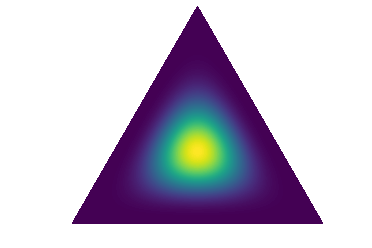

In [4]:
# just copy pasted from this link: http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import math
from functools import reduce
from math import gamma
from operator import mul

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)


"""
plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')
"""

midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)



class Dirichlet(object):
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    
class Normal3D(object):
    
    def __init__(self, mu, Sigma):
        self.mu = np.array(mu)
        self.Sigma = np.array(Sigma)
        self.const = 1 / (np.sqrt((2*np.pi)**3 * np.linalg.det(Sigma)))
        
    def pdf(self, x):
        """Calculate 3D Gaussian"""
        y = self.const * np.exp(-0.5 * (x - self.mu).T @ self.Sigma @ (x - self.mu))
        return(y)

def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    
draw_pdf_contours(Dirichlet([5, 5, 5]))

In [ ]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

In [ ]:
mu1 = np.array([0.5, 0.5, 0.5])
Sigma1 = 20*np.eye(3)
draw_pdf_contours(Normal3D(mu1, Sigma1))

In [21]:
#test the transformations from Gaussian to Dirichlet and back

def get_mu_from_Dirichlet(alpha):
    K = len(alpha)
    mu = []
    for i in range(K):
        mu_i = np.log(alpha[i]) - 1/K * np.sum(np.log(alpha))
        mu.append(mu_i)
        
    return(mu)

def get_Sigma_from_Dirichlet(alpha):
    K = len(alpha)
    sum_of_inv = 1/K * np.sum(1/alpha)
    Sigma = np.zeros((K,K))
    for k in range(K):
        for l in range(K):
            delta = 1 if k==l else 0
            Sigma[k][l] = delta * 1/alpha[k] - 1/K*(1/alpha[k] + 1/alpha[l] - sum_of_inv)
            
    return(Sigma)


def get_alpha_from_Normal(mu, Sigma):
    alpha = []
    K = len(Sigma[0])
    sum_exp = np.sum(np.exp(-1*np.array(mu)))
    for k in range(K):
        alpha.append(1/Sigma[k][k]*(1 - 2/K + np.exp(mu[k])/K**2 * sum_exp))
        
    return(alpha)


#alpha_test = np.array([1,2,3,4])
#alpha_test = np.array([1,1,1,1])
#alpha_test = np.array([1,10, 100, 1000])
alpha_test = np.array([1.3, 1.3])
print("alpha start: ", alpha_test)
mu_test = get_mu_from_Dirichlet(alpha_test)
print("mu: ", mu_test)
Sigma_test = get_Sigma_from_Dirichlet(alpha_test)
print("Sigma: ", Sigma_test)
alpha_end = get_alpha_from_Normal(mu_test, Sigma_test)
print("alpha end: ", alpha_end)

alpha start:  [1.3 1.3]
mu:  [0.0, 0.0]
Sigma:  [[ 0.38461538 -0.38461538]
 [-0.38461538  0.38461538]]
alpha end:  [1.3, 1.3]


# Beta Distribution

modes:  0.75 0.75 0.6666666666666667


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


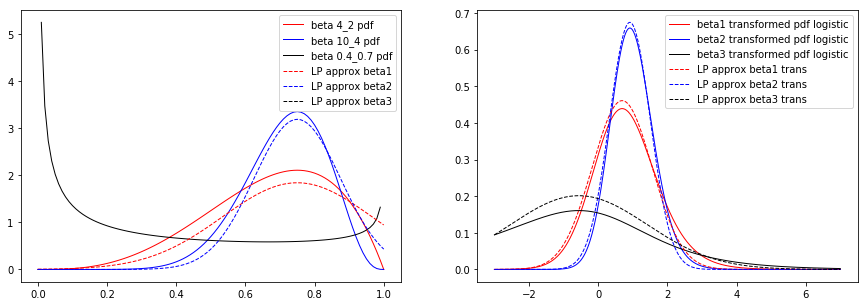

In [9]:
#change the basis, i.e. x -> t(x)
from scipy.special import gamma
from scipy.stats import norm


def logistic_transform(a):
    return(1 / (1 + np.exp(-a)))

def B(a,b):
    nom = gamma(a) * gamma(b)
    denom = gamma(a + b)
    return(nom/denom)

def beta_pdf(x, a, b):
    nom = x ** (a-1) * (1 - x) ** (b-1)
    denom = B(a, b)
    return(nom/denom)

def beta_pdf_trans_logit(x, a, b):
    #det_first_der = (1/x) - (1/(1-x))
    nom = (logit_transform(x)) ** (a-1) * (1 - logit_transform(x)) ** (b-1)
    denom = B(a, b)
    return((nom/denom))# * det_first_der)

def beta_pdf_trans_logistic(x, a, b, transform):
    #det_first_der = logistic_transform(x) * (1 - logistic_transform(x))
    #det_first_der = (1/x) - (1/(1-x))
    x_t = transform(x)
    nom = (x_t) ** (a) * (1- x_t) ** (b)
    denom = B(a, b)
    return((nom/denom))# * det_first_der)
    
"""Transforms"""
#transformed to logit space
def logit_transform(theta):
    return(np.log(theta/(1-theta)))

#transformed to softmax space
def softmax_transform(a):
    x = np.exp(a)/np.sum(np.exp(a))
    return(x)


def beta_mode(a, b):
    return((a-1)/(a+b-2))

def beta_sigma(a, b):
    return(((a-1)*(b-1))/(a+b-2)**3)

def mode_beta_trans(a,b):
    return(-np.log(b/a))

#def second_der_log_pdf_trans(x, a, b):
#    return(a*logistic_transform(x) * (1-logistic_transform(x))+ b * logistic_transform(x) * (1-logistic_transform(x)))

def beta_sigma_trans(a,b):
    return((a+b)/(a*b))

"""values"""

a1, b1 = 4, 2
a2, b2 = 10, 4
a3, b3 = 0.4, 0.7

mode1 = beta_mode(a1, b1)
mode2 = beta_mode(a2, b2)
mode3 = beta_mode(a3, b3)
print("modes: ", mode1, mode2, mode3)

sigma1 = np.sqrt(beta_sigma(a1, b1))
sigma2 = np.sqrt(beta_sigma(a2, b2))
sigma3 = np.sqrt(beta_sigma(a3, b3))

x = np.linspace(0,1, 100 + 1)
x2 = np.linspace(-3,7, 1000 + 1)
y1 = beta_pdf(x, a1, b1)
y2 = beta_pdf(x, a2, b2)
y3 = beta_pdf(x, a3, b3)

LP_approx1 = norm.pdf(x, mode1, sigma1)
LP_approx2 = norm.pdf(x, mode2, sigma2)
LP_approx3 = norm.pdf(x, mode3, sigma3)

y1_logistic = beta_pdf_trans_logistic(x2, a1, b1, logistic_transform)
y2_logistic = beta_pdf_trans_logistic(x2, a2, b2, logistic_transform)
y3_logistic = beta_pdf_trans_logistic(x2, a3, b3, logistic_transform)

mode1_trans = mode_beta_trans(a1,b1)
mode2_trans = mode_beta_trans(a2,b2)
mode3_trans = mode_beta_trans(a3,b3)

sigma1_trans = np.sqrt(beta_sigma_trans(a1, b1))
sigma2_trans = np.sqrt(beta_sigma_trans(a2, b2))
sigma3_trans = np.sqrt(beta_sigma_trans(a3, b3))


LP_approx1_trans = norm.pdf(x2, mode1_trans, sigma1_trans)
LP_approx2_trans = norm.pdf(x2, mode2_trans, sigma2_trans)
LP_approx3_trans = norm.pdf(x2, mode3_trans, sigma3_trans)


"""Plots"""
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 5))
#first plot
axs[0].plot(x, y1, 'r-', lw=1, alpha=1, label='beta 4_2 pdf')
axs[0].plot(x, y2, 'b-', lw=1, alpha=1, label='beta 10_4 pdf')
axs[0].plot(x, y3, 'k-', lw=1, alpha=1, label='beta 0.4_0.7 pdf')
axs[0].plot(x, LP_approx1, 'r--', lw=1, alpha=1, label='LP approx beta1')
axs[0].plot(x, LP_approx2, 'b--', lw=1, alpha=1, label='LP approx beta2')
axs[0].plot(x, LP_approx3, 'k--', lw=1, alpha=1, label='LP approx beta3')
#axs[0].plot(x, binom_posterior_a2_b2, 'b-', lw=1, alpha=1, label='beta a2_b2 pdf')
#axs[0].plot(x, normal_approx_a1_b1, 'g-', lw=1, alpha=1, label='normal a1_b1 pdf')
#axs[0].plot(x, normal_approx_a2_b2, 'k-', lw=1, alpha=1, label='normal a2_b2 pdf')
axs[0].legend();

#second plot
axs[1].plot(x2, y1_logistic, 'r-', lw=1, alpha=1, label='beta1 transformed pdf logistic')
axs[1].plot(x2, y2_logistic, 'b-', lw=1, alpha=1, label='beta2 transformed pdf logistic')
axs[1].plot(x2, y3_logistic, 'k-', lw=1, alpha=1, label='beta3 transformed pdf logistic')
#axs[1].plot(2*[mode1_trans], [0, max(y1_logistic)], 'r--', label="beta1 trans mode");
#axs[1].plot(2*[mode2_trans], [0, max(y2_logistic)], 'g--', label="beta2 trans mode");
#axs[1].plot(2*[mode3_trans], [0, max(y3_logistic)], 'b--', label="beta3 trans mode");
axs[1].plot(x2, LP_approx1_trans, 'r--', lw=1, alpha=1, label='LP approx beta1 trans')
axs[1].plot(x2, LP_approx2_trans, 'b--', lw=1, alpha=1, label='LP approx beta2 trans')
axs[1].plot(x2, LP_approx3_trans, 'k--', lw=1, alpha=1, label='LP approx beta3 trans')
axs[1].legend();

plt.savefig('beta_playground.pdf')

# Gamma Distribution

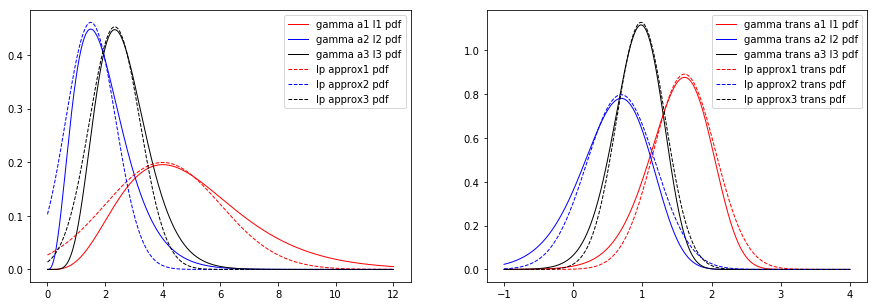

In [13]:
#change the basis, i.e. x -> t(x)
def gamma_func(n):
    return(np.math.factorial(n-1))

def gamma_pdf(x, a, l):
    r = l**a/gamma_func(a) * (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_pdf_trans(x, a, l, transform):
    r = l**a/gamma_func(a) * (transform(x) ** a) * (np.exp(-transform(x) * l))
    return(r)
    
"""Transforms"""

def exp_transform(a):
    return(np.exp(a))

def gamma_mode(a, l):
    return((a-1)/l)

def gamma_trans_mode(a, l):
    return(np.log(a/l))

def sigma_gamma(a,l):
    return((a-1)/l**2)

def sigma_gamma_trans(a):
    return(1/a)

"""values"""

a1, l1 = 5,1
a2, l2 = 4,2
a3, l3 = 8,3
mode1 = gamma_mode(a1, l1)
mode2 = gamma_mode(a2, l2)
mode3 = gamma_mode(a3, l3)

sigma1 = np.sqrt(sigma_gamma(a1, l1))
sigma2 = np.sqrt(sigma_gamma(a2, l2))
sigma3 = np.sqrt(sigma_gamma(a3, l3))

x = np.linspace(0, 12, 12000 + 1)
x_trans = np.linspace(-1, 4, 5000 + 1)
y1 = gamma_pdf(x, a1, l1)
y2 = gamma_pdf(x, a2, l2)
y3 = gamma_pdf(x, a3, l3)
lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

y1_trans = gamma_pdf_trans(x_trans, a1, l1, exp_transform)
y2_trans = gamma_pdf_trans(x_trans, a2, l2, exp_transform)
y3_trans = gamma_pdf_trans(x_trans, a3, l3, exp_transform)
mode1_trans = np.log(a1 / l1)
mode2_trans = np.log(a2 / l2)
mode3_trans = np.log(a3 / l3)

sigma1_trans = np.sqrt(sigma_gamma_trans(a1))
sigma2_trans = np.sqrt(sigma_gamma_trans(a2))
sigma3_trans = np.sqrt(sigma_gamma_trans(a3))
lp_approx1_trans = norm.pdf(x_trans, loc=mode1_trans, scale=sigma1_trans)
lp_approx2_trans = norm.pdf(x_trans, loc=mode2_trans, scale=sigma2_trans)
lp_approx3_trans = norm.pdf(x_trans, loc=mode3_trans, scale=sigma3_trans)

"""Plots"""
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 5))
#first plot
axs[0].plot(x, y1, 'r-', lw=1, alpha=1, label='gamma a1 l1 pdf')
axs[0].plot(x, y2, 'b-', lw=1, alpha=1, label='gamma a2 l2 pdf')
axs[0].plot(x, y3, 'k-', lw=1, alpha=1, label='gamma a3 l3 pdf')
axs[0].plot(x, lp_approx1, 'r--', lw=1, alpha=1, label='lp approx1 pdf')
axs[0].plot(x, lp_approx2, 'b--', lw=1, alpha=1, label='lp approx2 pdf')
axs[0].plot(x, lp_approx3, 'k--', lw=1, alpha=1, label='lp approx3 pdf')
#axs[0].plot(2*[mode1], [0, max(y1)], 'r--', label="gamma1 mode");
#axs[0].plot(2*[mode2], [0, max(y2)], 'g--', label="gamma2 mode");
#axs[0].plot(x, binom_posterior_a2_b2, 'b-', lw=1, alpha=1, label='beta a2_b2 pdf')
#axs[0].plot(x, normal_approx_a1_b1, 'g-', lw=1, alpha=1, label='normal a1_b1 pdf')
#axs[0].plot(x, normal_approx_a2_b2, 'k-', lw=1, alpha=1, label='normal a2_b2 pdf')
axs[0].legend();

#second plot
axs[1].plot(x_trans, y1_trans, 'r-', lw=1, alpha=1, label='gamma trans a1 l1 pdf')
axs[1].plot(x_trans, y2_trans, 'b-', lw=1, alpha=1, label='gamma trans a2 l2 pdf')
axs[1].plot(x_trans, y3_trans, 'k-', lw=1, alpha=1, label='gamma trans a3 l3 pdf')
axs[1].plot(x_trans, lp_approx1_trans, 'r--', lw=1, alpha=1, label='lp approx1 trans pdf')
axs[1].plot(x_trans, lp_approx2_trans, 'b--', lw=1, alpha=1, label='lp approx2 trans pdf')
axs[1].plot(x_trans, lp_approx3_trans, 'k--', lw=1, alpha=1, label='lp approx3 trans pdf')
#axs[1].plot(x_logit, normal_approx_a2_b2_logit, 'k-', lw=1, alpha=1, label='normal a2_b2 pdf logit')
#axs[1].hist(binom_post_logit_a1_b1_sample, bins=200, density=True, color='r', alpha = 0.5, label='beta a1_b1 logit')
#axs[1].hist(binom_post_logit_a2_b2_sample, bins=200, density=True, color='b', alpha = 0.5, label='beta a2_b2 logit')
axs[1].legend();

plt.savefig('gamma_playground.pdf')

# Chi Squared Distribution

1.3862943611198906


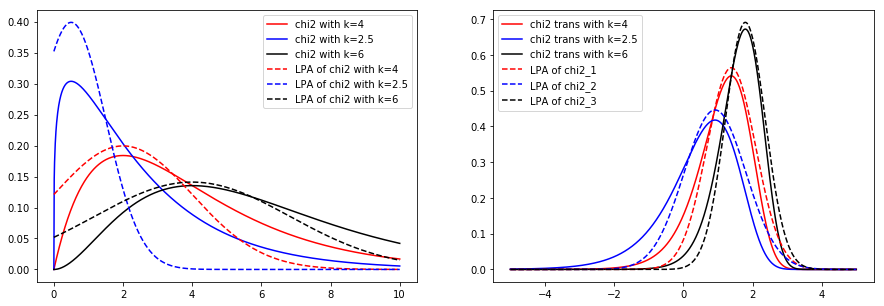

In [15]:
#change the basis
from scipy.special import gamma

def chi2_pdf(x, k):
    nom = x**(k/2 - 1) * np.exp(-x/2)
    den = 2**(k/2) * gamma(k/2)
    return(nom/den)

def chi2_trans_pdf(x, k, transform):
    nom = transform(x)**(k/2) * np.exp(-transform(x)/2)
    den = 2**(k/2) * gamma(k/2)
    return(nom/den)

def chi2_mode(k):
    return(np.max(k-2, 0))

def chi2_sigma(k):
    if k <= 2:
        raise(ValueError('if k is equal to or lower than 2 you cannot fit a normal'))
    s = (k-2)**2 / (k/2 - 1)
    return(s)

def chi2_trans_mode(k):
    return(np.log(k))

def chi2_trans_sigma(k):
    return(2/k)

#transformed to logit space
def exp_transform(a):
    return(np.exp(a))

k1 = 4
k2 = 2.5
k3 = 6
x = np.linspace(0,10, 1000 +1)
y1 = chi2_pdf(x, k1)
y2 = chi2_pdf(x, k2)
y3 = chi2_pdf(x, k3)

mode1 = chi2_mode(k1)
mode2 = chi2_mode(k2)
mode3 = chi2_mode(k3)

sigma1 = np.sqrt(chi2_sigma(k1))
sigma2 = chi2_sigma(k2)
sigma3 = np.sqrt(chi2_sigma(k3))

approx1 = norm.pdf(x, mode1, sigma1)
approx2 = norm.pdf(x, mode2, sigma2)
approx3 = norm.pdf(x, mode3, sigma3)

x_trans = np.linspace(-5, 5, 1000 +1)
y1_trans = chi2_trans_pdf(x_trans, k1, exp_transform)
y2_trans = chi2_trans_pdf(x_trans, k2, exp_transform)
y3_trans = chi2_trans_pdf(x_trans, k3, exp_transform)

mode1_trans = chi2_trans_mode(k1)
print(mode1_trans)
mode2_trans = chi2_trans_mode(k2)
mode3_trans = chi2_trans_mode(k3)

sigma1_trans = np.sqrt(chi2_trans_sigma(k1))
sigma2_trans = np.sqrt(chi2_trans_sigma(k2))
sigma3_trans = np.sqrt(chi2_trans_sigma(k3))

approx1_trans = norm.pdf(x_trans, loc=mode1_trans, scale=sigma1_trans)
approx2_trans = norm.pdf(x_trans, loc=mode2_trans, scale=sigma2_trans)
approx3_trans = norm.pdf(x_trans, loc=mode3_trans, scale=sigma3_trans)

#plots:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 5))
axs[0].plot(x, y1, 'r-', label="chi2 with k=4");
axs[0].plot(x, y2, 'b-', label="chi2 with k=2.5");
axs[0].plot(x, y3, 'k-', label="chi2 with k=6");
axs[0].plot(x, approx1, 'r--', label="LPA of chi2 with k=4");
axs[0].plot(x, approx2, 'b--', label="LPA of chi2 with k=2.5");
axs[0].plot(x, approx3, 'k--', label="LPA of chi2 with k=6");
axs[0].legend();

axs[1].plot(x_trans, y1_trans, 'r-', label="chi2 trans with k=4");
axs[1].plot(x_trans, y2_trans, 'b-', label="chi2 trans with k=2.5");
axs[1].plot(x_trans, y3_trans, 'k-', label="chi2 trans with k=6");
axs[1].plot(x_trans, approx1_trans, 'r--', label="LPA of chi2_1");
axs[1].plot(x_trans, approx2_trans, 'b--', label="LPA of chi2_2");
axs[1].plot(x_trans, approx3_trans, 'k--', label="LPA of chi2_3");
axs[1].legend();

plt.savefig('chi2_playground.pdf')


# Wishart Distribution

[0.00126156 0.10892176 0.14793434 0.17400548 0.1929669 ]
[0.00126156 0.10892176 0.14793434 0.17400548 0.1929669 ]


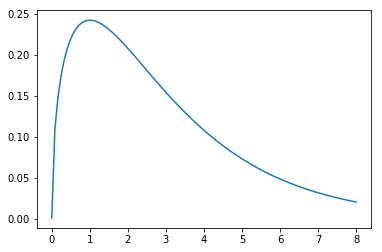

In [30]:
from scipy.stats import wishart, chi2
x = np.linspace(1e-5, 8, 100)
w = wishart.pdf(x, df=3, scale=1)
print(w[:5])
c = chi2.pdf(x, 3)
print(c[:5])
plt.plot(x, w);

(301, 2, 2)
(301,)


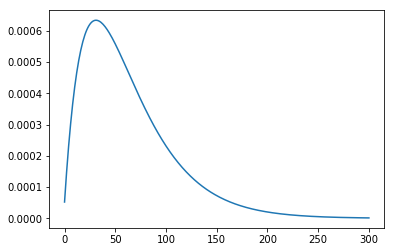

In [31]:
xx = []
a_11 = np.linspace(0.1, 30.1, 300 +1)
a_22 = np.linspace(0.1, 30.1, 300 +1)
rho = 0.5

s = np.array([[4,2],
             [2,3]])

for i in range(len(a_11)):
    a_12 = rho*np.sqrt(a_11[i] * a_22[i])
    xx.append(np.array([[a_11[i], a_12],[a_12, a_22[i]]]))

w = []
print(np.shape(xx))
for x in xx:
    w_ = wishart.pdf(x, df=4, scale=s)
    #print(w_)
    w.append(w_)
print(np.shape(w))

plt.plot(w);

mode1:  [[4 2]
 [2 3]]
mode2:  [[12  6]
 [ 6  9]]
mode3:  [[20 10]
 [10 15]]
sigma1:  [[ 0.16666667 -0.25      ]
 [-0.25        0.125     ]]
(301, 2, 2)
normal1:  (301, 2, 2)


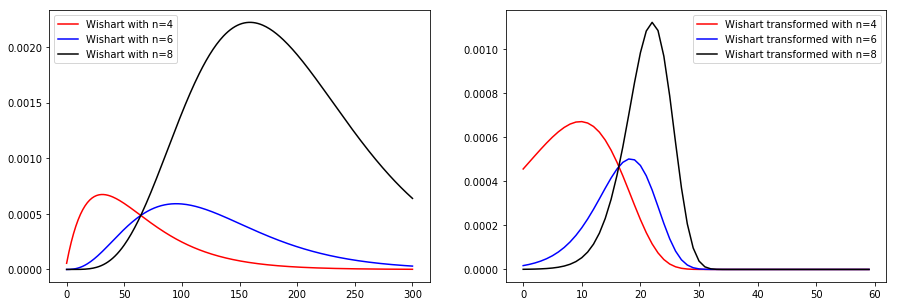

In [33]:
#play with the wishart
from scipy.special import gamma
from scipy.linalg import expm

def multi_variate_gamma(p, a):
    a = np.pi**(p*(p-1)/4) 
    b = np.prod([gamma(a + (1-j)/2) for j in range(1, p + 1)])
    return(a*b)

def wishart_pdf(X, n, V):
    p = np.shape(X)[0]
    nom = np.linalg.det(X)**((n-p-1)/2) * np.exp(-np.trace(np.linalg.inv(V) @ X)/2)
    den = 2**(n*p/2) * np.linalg.det(V)**(n/2) * multi_variate_gamma(p, n/2)
    return(nom/den)

def wishart_pdf_trans(X, n, V, transform):
    p = np.shape(X)[0]
    nom = np.linalg.det(transform(X))**((n-p-1)/2) * np.exp(-np.trace(np.linalg.inv(V) @ transform(X))/2)
    den = 2**(n*p/2) * np.linalg.det(V)**(n/2) * multi_variate_gamma(p, n/2)
    return(nom/den)
   
def multivariate_normal_pdf(X, mu, Sigma):
    k = np.shape(X)[0]
    a = (2*np.pi)**(-k/2) * np.linalg.det(Sigma)**(-1/2)
    b = np.exp(-1/2 * (X-mu).T @ Sigma @ (X-mu))
    return(a*b)


def wishart_mode(n, p, V):
    return((n-p-1) * V)
    
def wishart_approx_sigma(n, p, V):
    a = (n-p-1)/2
    b = 1/(np.linalg.det((n-p-1)*V)* np.linalg.inv(V).T)
    return(a*b)
    
    
""" values """
s = np.array([[4,2],
             [2,3]])

n1 = 4
n2 = 6
n3 = 8

mode1 = wishart_mode(n1, p=2, V=s)
mode2 = wishart_mode(n2, p=2, V=s)
mode3 = wishart_mode(n3, p=2, V=s)
print("mode1: ", mode1)
print("mode2: ", mode2)
print("mode3: ", mode3)

sigma1 = wishart_approx_sigma(n1, p=2, V=s)
print("sigma1: ", sigma1)

w1 = []
w2 = []
w3 = []
normal1 = []

print(np.shape(xx))
for x in xx:
    w_1 = wishart_pdf(X=x, n=n1, V=s)
    w_2 = wishart_pdf(X=x, n=n2, V=s)
    w_3 = wishart_pdf(X=x, n=n3, V=s)
    normal_1 = multivariate_normal_pdf(X=x, mu=mode1, Sigma=s)
    #print(w_)
    w1.append(w_1)
    w2.append(w_2)
    w3.append(w_3)
    normal1.append(normal_1)
    
print("normal1: ", np.shape(normal1))

w1_trans = []
w2_trans = []
w3_trans = []
for x in xx:
    w_1 = wishart_pdf_trans(X=x, n=n1, V=s, transform=expm)
    w_2 = wishart_pdf_trans(X=x, n=n2, V=s, transform=expm)
    w_3 = wishart_pdf_trans(X=x, n=n3, V=s, transform=expm)
    #print(w_)
    w1_trans.append(w_1)
    w2_trans.append(w_2)
    w3_trans.append(w_3)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 5))
axs[0].plot(w1, 'r', label="Wishart with n={}".format(n1));
axs[0].plot(w2, 'b', label="Wishart with n={}".format(n2));
axs[0].plot(w3, 'k', label="Wishart with n={}".format(n3));
#axs[0].plot(normal1, 'g', label="normal approx of wishart1"'');
axs[0].legend();

axs[1].plot(w1_trans[:60], 'r', label="Wishart transformed with n={}".format(n1));
axs[1].plot(w2_trans[:60], 'b', label="Wishart transformed with n={}".format(n2));
axs[1].plot(w3_trans[:60], 'k', label="Wishart transformed with n={}".format(n3));
axs[1].legend();

plt.savefig('wishart_playground.pdf')

# inverse Wishart Distribution

In [17]:
xx = []
len_x = 500
a_11 = np.linspace(0.1, 2.1, len_x +1)
a_22 = np.linspace(0.1, 2.1, len_x +1)
rho = 0.5


xx_trans = []
a_11_trans = np.linspace(-4, 2, len_x +1)
a_22_trans = np.linspace(-4, 2, len_x +1)
s = np.array([[4,2],
             [2,3]])

for i in range(len(a_11)):
    a_12 = rho*np.sqrt(a_11[i] * a_22[i])
    xx.append(np.array([[a_11[i], a_12],[a_12, a_22[i]]]))
    a_12_trans = rho*np.sqrt(a_11_trans[i] * a_22_trans[i])
    xx_trans.append(np.array([[a_11_trans[i], a_12_trans], [a_12_trans, a_22_trans[i]]]))

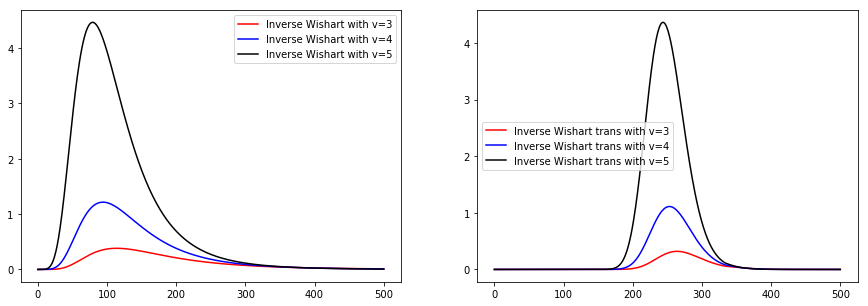

In [20]:
from scipy.special import gamma
from scipy.linalg import expm, logm

def multi_variate_gamma(p, a):
    a = np.pi**(p*(p-1)/4) 
    b = np.prod([gamma(a + (1-j)/2) for j in range(1, p + 1)])
    return(a*b)

def inverse_wishart_pdf(X, v, Psi):
    p = np.shape(X)[0]
    nom = np.linalg.det(Psi)**(v/2) * np.linalg.det(X)**(-(v+p+1)/2) * np.exp(-1/2*np.trace(Psi @ np.linalg.inv(X)))
    den = 2**(v*p/2) * multi_variate_gamma(p, v/2)
    return(nom/den)

def inverse_wishart_trans_pdf(X, v, Psi, transformation):
    p = np.shape(X)[0]
    nom = np.linalg.det(Psi)**(v/2) * np.linalg.det(transformation(X))**(-(v+p+1)/2) * np.exp(-1/2*np.trace(Psi @ np.linalg.inv(transformation(X))))
    den = 2**(v*p/2) * multi_variate_gamma(p, v/2)
    return(nom/den)

""" values """

v1 = 3
v2 = 4
v3 = 5

iw1 = []
iw2 = []
iw3 = []

iw1_trans = []
iw2_trans = []
iw3_trans = []

si = np.array([[1,0],
             [0,1]])

for i in range(len(xx)):
    x = xx[i]
    x_t = xx_trans[i]
    iw_1 = inverse_wishart_pdf(X=x, v=v1, Psi=s)
    iw_2 = inverse_wishart_pdf(X=x, v=v2, Psi=s)
    iw_3 = inverse_wishart_pdf(X=x, v=v3, Psi=s)
    iw_trans_1 = inverse_wishart_trans_pdf(X=x_t, v=v1, Psi=s, transformation=expm)
    iw_trans_2 = inverse_wishart_trans_pdf(X=x_t, v=v2, Psi=s, transformation=expm)
    iw_trans_3 = inverse_wishart_trans_pdf(X=x_t, v=v3, Psi=s, transformation=expm)
    iw1.append(iw_1)
    iw2.append(iw_2)
    iw3.append(iw_3)
    iw1_trans.append(iw_trans_1)
    iw2_trans.append(iw_trans_2)
    iw3_trans.append(iw_trans_3)


fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 5))
axs[0].plot(iw1, 'r', label="Inverse Wishart with v={}".format(v1));
axs[0].plot(iw2, 'b', label="Inverse Wishart with v={}".format(v2));
axs[0].plot(iw3, 'k', label="Inverse Wishart with v={}".format(v3));
#axs[0].plot(normal1, 'g', label="normal approx of wishart1"'');
axs[0].legend();

axs[1].plot(iw1_trans, 'r', label="Inverse Wishart trans with v={}".format(v1));
axs[1].plot(iw2_trans, 'b', label="Inverse Wishart trans with v={}".format(v2));
axs[1].plot(iw3_trans, 'k', label="Inverse Wishart trans with v={}".format(v3));
#axs[0].plot(normal1, 'g', label="normal approx of wishart1"'');
axs[1].legend();

plt.savefig('inverse_wishart_playground.pdf')